In [16]:
import cv2
import numpy as np
import os
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.preprocessing import image

In [25]:

model_path = r'C:\Users\pp01880\ML\Algo\models\CNNbestalgotest50.h5'


input_format = 'jpeg'
test_images_folder = r'C:\Users\pp01880\ML\Algo\crossvalidation\Dataset'
model = tf.keras.models.load_model(model_path)


image_files = os.listdir(test_images_folder)


labels = ['Colagem', 'DefeitoUS', 'Erro_ leituraUS', 'OK', 'Profundidade', 'Recobrimento']
results = []

print(labels)

['Colagem', 'DefeitoUS', 'Erro_ leituraUS', 'OK', 'Profundidade', 'Recobrimento']


Classificação de imagem unitária:

<function matplotlib.pyplot.show(close=None, block=None)>

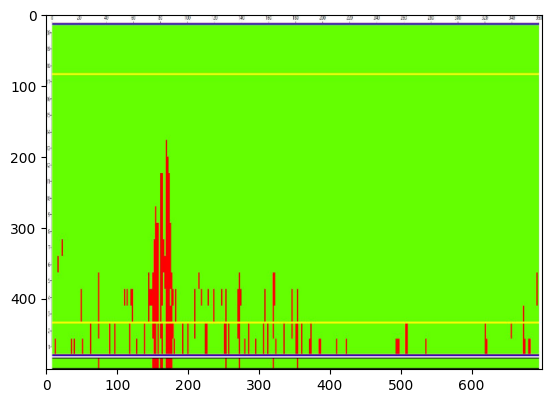

In [12]:
import cv2
import matplotlib.pyplot as plt
import os

try:
    img = cv2.imread('imgrecu.jpeg')

    if img is not None:  # Check if image is loaded successfully
        rgb_img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        plt.imshow(rgb_img)
    else:
        print("Error: Could not read image file.")
except Exception as e:
    print("An unexpected error occurred:", e)


resize = tf.image.resize(rgb_img, (500,700))
plt.imshow(resize.numpy().astype(int))
plt.show

In [13]:
np.expand_dims(resize,0).shape
result = model.predict(np.expand_dims(resize/255,0))
result

1/1 [==============================] - 0s 366ms/step


array([[1.0523997e-03, 2.0074834e-01, 8.5324355e-06, 7.9819077e-01]],
      dtype=float32)

Classificação de dataset:

In [22]:

# Loop sobre cada imagem na pasta
for image_file in image_files:
    # Certifica-se de que é um arquivo de imagem
    if image_file.endswith('.' + input_format):
        # Carrega a imagem
        img_path = os.path.join(test_images_folder, image_file)
        img = image.load_img(img_path, target_size=(500, 700))  
        img_array = image.img_to_array(img)
        img_array = np.expand_dims(img_array, axis=0)  # Adiciona uma dimensão extra para corresponder ao formato de entrada do modelo
        predictions = model.predict(img_array)
        
        # Armazena os resultados em uma lista
        results.append([image_file] + predictions[0].tolist())

# Cria um DataFrame com os resultados
df = pd.DataFrame(results, columns=['Image'] + labels)

#if os.path.exists(excel_output_path):
    #os.remove(excel_output_path)

# Salva o DataFrame em um arquivo Excel
excel_output_path = r'C:\Users\pp01880\ML\Algo\crossvalidation\CNNbestalgotest49.xlsx'
df.to_excel(excel_output_path, index=False)

print(f'Resultados salvos em {excel_output_path}')


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━